In [89]:
from queries import get_data
from utils import *
from statsmodels.tsa.api import ETSModel, seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [101]:
# DEFINE GLOBAL VARIABLES

COUNTRIES = ['Germany', 'Italy', 'Spain']
CASE_TYPE = ['Confirmed', 'Active', 'Deaths']

TRAIN_SIZE = 500
PRED_WINDOW = 50
THRESHOLD = 100 # number of cases below which I am _not_ tracking

# Basic EDA

In [102]:
df = get_data(country="Canada", preprocess=True) 

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 884 entries, 2020-01-23 00:00:00+00:00 to 2022-06-24 00:00:00+00:00
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           884 non-null    object
 1   Country      884 non-null    object
 2   CountryCode  884 non-null    object
 3   Province     884 non-null    object
 4   City         884 non-null    object
 5   CityCode     884 non-null    object
 6   Lat          884 non-null    object
 7   Lon          884 non-null    object
 8   Confirmed    884 non-null    int64 
 9   Deaths       884 non-null    int64 
 10  Recovered    884 non-null    int64 
 11  Active       884 non-null    int64 
dtypes: int64(4), object(8)
memory usage: 89.8+ KB


In [104]:
df.describe()

,Confirmed,Deaths,Recovered,Active
count,8.840000e+02,884.000000,8.840000e+02,8.840000e+02
mean,1.085264e+06,19080.470588,2.989235e+05,8.008399e+05
std,1.042768e+06,10822.879240,4.577997e+05,1.155665e+06
min,2.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,1.155272e+05,9063.750000,0.000000e+00,0.000000e+00
50%,8.946150e+05,21950.000000,4.043100e+04,8.651500e+03
75%,1.427778e+06,26297.750000,4.532852e+05,1.401481e+06
max,3.351691e+06,37270.000000,1.405971e+06,3.314421e+06


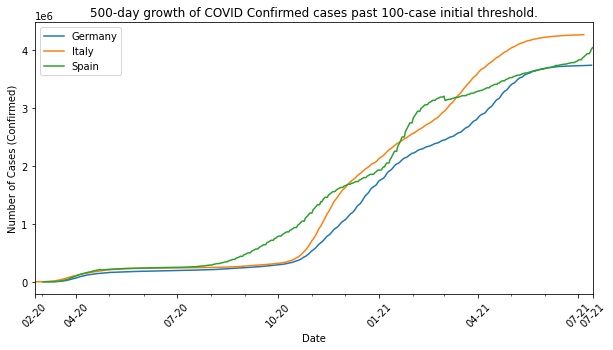

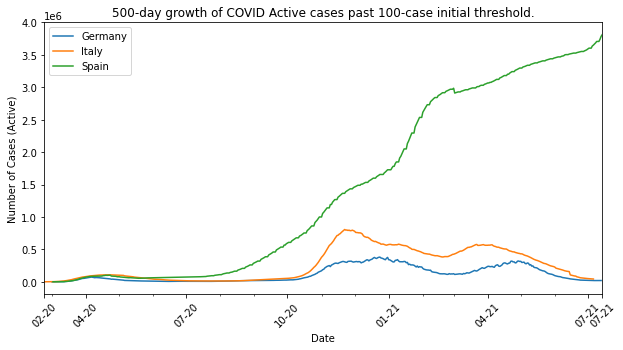

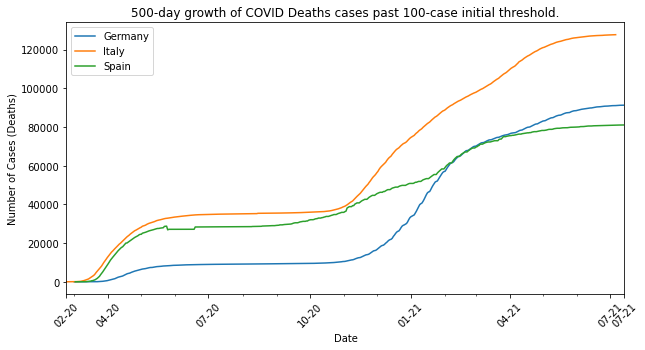

In [105]:
for case_type in CASE_TYPE:
    figure, _ = plot_initial_growth(
        COUNTRIES, 
        first_n_days=TRAIN_SIZE, 
        threshold=THRESHOLD, 
        case_type=case_type, 
        title=f"{TRAIN_SIZE}-day growth of COVID {case_type} cases past {THRESHOLD}-case initial threshold."
        )

    figure.figure.set_figheight(5)
    figure.figure.set_figwidth(10)

# Analysis of time-series data

In [108]:
# Let's look more closely at Italy's Active COVID cases

italy_active_cases = get_data(country="Italy", threshold=THRESHOLD, first_n_days=TRAIN_SIZE + PRED_WINDOW)
train_data = italy_active_cases.iloc[:TRAIN_SIZE][['Active']]
test_data = italy_active_cases.iloc[-PRED_WINDOW:][['Active']]

# sanity check to make sure nothing is going wrong with splitting
assert len(italy_active_cases) == len(train_data) + len(test_data)

train_data.freq, test_data.freq = pd.infer_freq(train_data), pd.infer_freq(test_data)

Text(0.5, 1.0, 'seasonal')

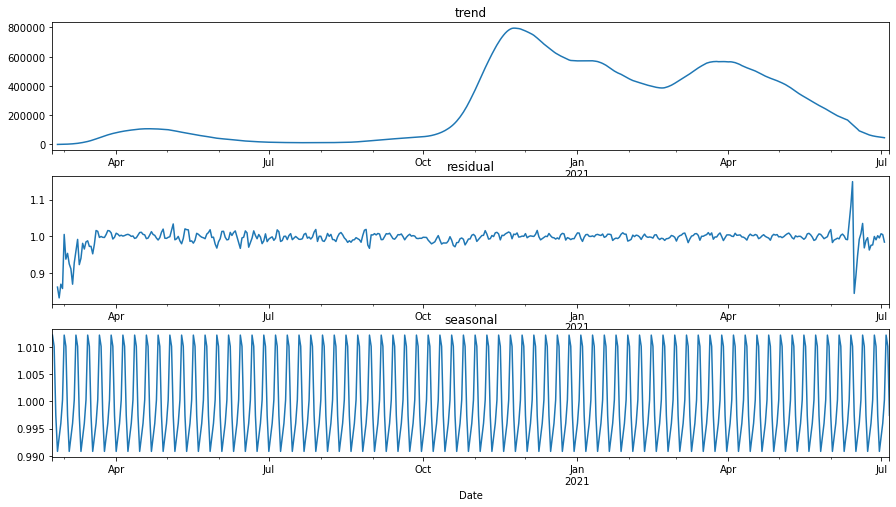

In [109]:
# Model selection/diagnostic
import pandas as pd

x = seasonal_decompose(train_data, model="multiplicative")
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))

x.trend.plot(ax=ax1)
x.resid.plot(ax=ax2)
x.seasonal.plot(ax=ax3)

ax1.set_title('trend')
ax2.set_title('residual')
ax3.set_title('seasonal')


Looks like the spike in the residuals comes from a large and quick drop in active cases.

In [112]:
from statsmodels.tsa.stattools import adfuller

DF_test = adfuller(train_data)
DF_pvalue = DF_test[1]

print(f"Dickey-Fuller test for stationarity yield p-value of: {DF_pvalue}")

Dickey-Fuller test for stationarity yield p-value of: 0.4336452903197229


The p-value here suggests we can reject the null hypothesis of the Augmented Dickey-Fuller test; so before I'd go about fitting a time-series model to this, I'd begin by looking at methods to make the time series stationary.

In [98]:
# Train/fit

In [99]:
# Predict + Predict Viz

In [100]:
# Evaluation